In [1]:
import os
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def calculate_identity(query,database):
    if len(query) == len(database):
        return np.sum([1 for i in range(len(query)) if query[i] == database[i]])/len(query)
    
    elif len(query) > len(database):
        max_score = 0
        diff_len = len(query) - len(database)
        for i in range(diff_len + 1):
            query_shortened = query[i:i+len(database)]
            score = np.sum([1 for i in range(len(query_shortened)) if query_shortened[i] == database[i]])/len(query_shortened)
            if score > max_score:
                max_score = score

        return max_score
    
    elif len(query) < len(database):
        max_score = 0
        diff_len = len(database) - len(query)
        for i in range(diff_len + 1):
            database_shortened = database[i:i+len(query)]
            score = np.sum([1 for i in range(len(query)) if query[i] == database_shortened[i]])/len(database_shortened)
            if score > max_score:
                max_score = score

        return max_score

In [3]:
path_to_partitions = "../data/partitions"
partitions = []
for file in os.listdir(path_to_partitions):
    path_to_file = os.path.join(path_to_partitions,file)
    data = pd.read_csv(path_to_file,sep="\t",names=["peptide","label","HLA"])
    partitions.append(data)

0.9


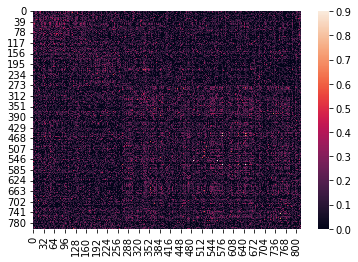

SystemExit: 1

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
for i in range(len(partitions)):
    for j in range(i+1, len(partitions)):
        partition1 =  partitions[i]
        partition2 = partitions[j]
        identity = [[calculate_identity(pep1,pep2) for pep1 in partition1["peptide"]] for pep2 in partition2["peptide"]]

        print(np.max(identity))
        sns.heatmap(np.array(identity))
        plt.show()
        sys.exit(1)

In [33]:
def load_training_and_validataion_dataset(path_to_partitions,train_splits):
    import random
    training_partions = random.sample(range(10),train_splits)
    validation_partions = [i for i in range(10) if i not in training_partions]

    # path_to_partitions = "../data/partitions"
    partitions = []
    for file in os.listdir(path_to_partitions):
        path_to_file = os.path.join(path_to_partitions,file)
        data = pd.read_csv(path_to_file,sep="\t",names=["peptide","label","HLA"])
        partitions.append(data)
    training_df = pd.concat([partitions[i] for i in training_partions])
    validation_df = pd.concat([partitions[i] for i in validation_partions])
    return training_df, validation_df

def retrieve_information_from_df(data_split,entire_df):
    potential = []
    immunogenicity = []
    tested = []
    responded = []
    for i,row in data_split.iterrows():
        peptide, HLA = row["peptide"], row['HLA']
        original_entry = entire_df[(entire_df['peptide']==peptide) & (entire_df['HLA'] == HLA)]
        assert len(original_entry) == 1
        potential.append(float(original_entry['potential']))
        immunogenicity.append(original_entry['immunogenicity'].values[0])
        tested.append(int(original_entry['test']))
        responded.append(int(original_entry['respond']))
     
    data_split['potential'] = potential
    data_split['immunogenicity'] = immunogenicity
    data_split['test'] = tested
    data_split['respond'] = responded

    return data_split  

entire_df = pd.read_csv('../data/deep_immuno_2.csv')
training_df, validation_df = load_training_and_validataion_dataset(path_to_partitions="../data/partitions",train_splits=9)
data = retrieve_information_from_df(training_df,entire_df)

        peptide  label         HLA  potential immunogenicity  test  respond
0     FMNKHILSY      0  HLA-A*0101   0.336273       Negative     4        0
1    KECDKYKEDL      0  HLA-B*4402   0.335900       Negative     4        0
2    DYCNVLNKEF      0  HLA-A*2402   0.328614       Negative     4        0
3     HTITKAFGY      0  HLA-A*0101   0.328431       Negative     4        0
4     AMEKSSKYY      0  HLA-A*0101   0.326495       Negative     4        0
..          ...    ...         ...        ...            ...   ...      ...
804  YVVIAILTVV      1  HLA-A*0201   0.422955       Positive    42        1
805   LWPKTHTLW      1  HLA-A*2402   0.391119       Positive    50        1
806   YVILTILTI      1  HLA-A*2402   0.384213       Positive    50        1
807  NFLEVEDYGF      1  HLA-A*2402   0.372233       Positive    50        1
808   GIIYIIYKL      1  HLA-A*0201   0.280177       Positive    89        4

[7223 rows x 7 columns]
